# European Option pricing with GBM and Monte Carlo



## **Step #1:** Define GBM function

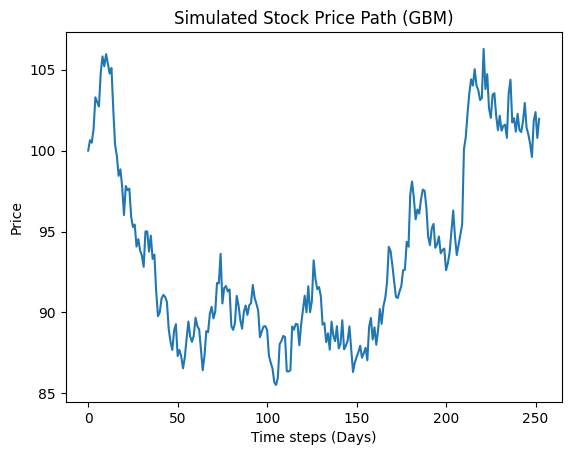

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# define parameters for the GBM function

S0= 100                       # initial stock price
mu = 0.05                     # expected return
sigma = 0.2                   # volatility
T = 1                         # time in years
dt = 1/252                    # daily steps (there are 252 trading days in a year)
N = int(T/dt)                 # number of steps

np.random.seed(42)

# Simulate one stock path with GBM
def simulate_gbm(S0, mu, sigma, T, N):
    dt = T/N
    prices = [S0]
    for _ in range(N):
        dW = np.random.normal(0, np.sqrt(dt))
        dS = mu*prices[-1]*dt + sigma*prices[-1]*dW
        prices.append(prices[-1]+dS)

    return  np.array(prices)

prices = simulate_gbm(S0, mu, sigma, T, N)

plt.plot(prices)
plt.title("Simulated Stock Price Path (GBM)")
plt.xlabel("Time steps (Days)")
plt.ylabel("Price")

plt.savefig(r"C:\Users\serge\OneDrive\Desktop\finance-projects\monte_carlo_option_pricing\simulated_stock_path_GBM.png", dpi=300)

plt.show()

## **Step #2:** Simulate multiple stock paths

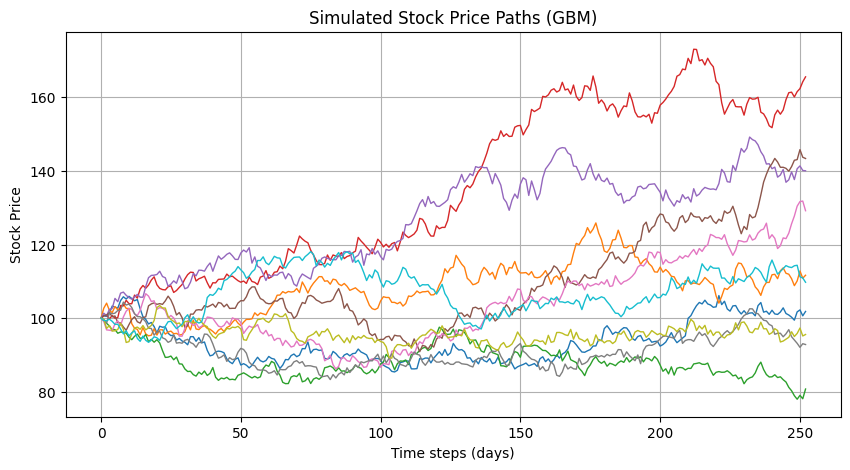

In [2]:
# Define parameters
S0= 100                       # initial stock price
mu = 0.05                     # expected return
sigma = 0.2                   # volatility
T = 1                         # time in years
dt = 1/252                    # daily steps (there are 252 trading days in a year)
N = int(T/dt)                 # number of time steps
M = 1000                      # number of simulated paths

np.random.seed(42)

# Function that simulates multiple stock paths with GBM and returns them in a numpy matrix (2-d array --> each row is a different path and each column is a different time step)
def simulate_gbm_paths(S0, mu, sigma, T, N, M):
    dt = T/N
    # Generate Random Standard Normal values
    Z = np.random.normal(0,1, (M,N))
    # Precompute the drift and diffusion components (based on expected return (mean) and volatility (variance))
    drift = (mu - 0.5*sigma**2)*dt
    diffusion = sigma*np.sqrt(dt)*Z
    # Caculate the log returns
    log_returns = drift+diffusion
    # Cumulative sum for log prices
    log_price_paths = np.cumsum(log_returns, axis=1)
    log_price_paths = np.hstack([np.zeros((M,1)), log_price_paths])
    # Convert to price_paths
    price_paths = S0*np.exp(log_price_paths)

    return price_paths


# Simulate the paths
paths = simulate_gbm_paths(S0, mu, sigma, T, N, M)

# Plot 10 sample paths
plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(paths[i], linewidth = 1)
plt.title("Simulated Stock Price Paths (GBM)")
plt.xlabel("Time steps (days)")
plt.ylabel("Stock Price")
plt.grid(True)

plt.savefig(r"C:\Users\serge\OneDrive\Desktop\finance-projects\monte_carlo_option_pricing\simulated_stock_paths_GBM.png", dpi = 300)

plt.show()
    

## **Step #3:** Compute European Call Option Payoffs

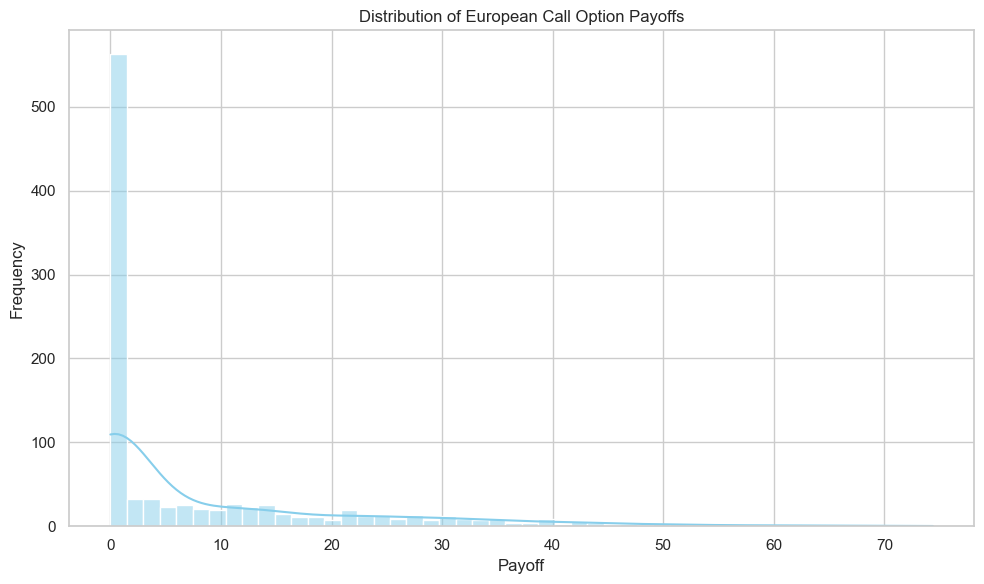

In [6]:
# Strike price
K = 105

# Get the final stock price from each path (at maturity T)
final_prices = paths[:,-1]

# Compute payoffs
call_payoffs = np.maximum(final_prices - K, 0)

import seaborn as sns

# Example: 'option_payoffs' is a NumPy array of simulated payoffs
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(call_payoffs, bins=50, kde=True, color='skyblue')
plt.title("Distribution of European Call Option Payoffs")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("visuals/option_payoff_distribution.png", dpi=300)
plt.show()


## **Step #4:** Compute fair option price


In [4]:
# Parameters
r = 0.05                     #risk-free rate
T = 1                        #time to maturity in years

# Estimate option price using discounted expected value of the option payoff
option_price = np.exp(-r*T)*np.mean(call_payoffs)

print(f"Estimated Fair Call Option Price: {option_price:.2f}")

Estimated Fair Call Option Price: 7.85


## Summary

### *Defined GBM function*
   -----------
### *Generated stochastic stock paths with GBM*
   --------
### *Computed European Call Option payoff for each path*
---------
### *Found discounted expected value (fair price) of the European Call Option*
-------